Jorge Ortiz. Simulacion. GitHub: https://github.com/jorgeortizc05/simulacion

## Práctica 1 - SimPy SED

Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica comparativa de la simulación con 3.

Lavanderia UPS
llega: FURGONETA
{}
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 0.00.
Llega vehiculo: Vehiculo-7 a la hora 0.00.
Llega vehiculo: Vehiculo-8 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-9 a la hora 2.00.
Llega vehiculo: Vehiculo-10 a la hora 4.00.
Llega vehiculo: Vehiculo-11 a la hora 6.00.
Llega vehiculo: Vehiculo-12 a la hora 8.00.
Removido  {81%} suciedad vehiculo => Vehiculo-1 
Removido  {46%} suciedad vehiculo => Vehiculo-2 
Removido  {50%} suciedad vehiculo => Vehiculo-3 
Removido  {42%} suciedad vehiculo => Vehiculo-4 
Llega vehiculo: Vehiculo-13 a la hora 

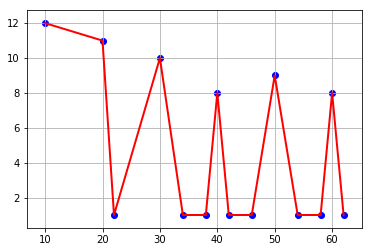

In [12]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 20
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 5
# Tiempo de simulación
TIEMPO_SIMULACION = 65

vehiculos = { 'BUS' : [5, NUM_MAQUINAS, 20, 4, TIEMPO_SIMULACION ], 
           'AUTOMOVIL' : [12, NUM_MAQUINAS, 7, 1, TIEMPO_SIMULACION ],
            'FURGONETA': [8, NUM_MAQUINAS, 12, 2, TIEMPO_SIMULACION ]}

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(TIEMPO_LAVADO)
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

        k=env.now
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
    
def ejecutar_simulacion(env, max_vehiculos, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(max_vehiculos):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(intervalo)
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

# Inicializamos la semilla aleatoria

# Creamos el entorno de simulacion
for i in vehiculos:
    print('=============================================================================================')
    print('Lavanderia UPS')
    print('llega:', i)
    print('=============================================================================================')
    print(tiempo)
    random.seed(77)
    env=simpy.Environment()
    env.process(ejecutar_simulacion(env, entrada[i][0], entrada[i][1], entrada[i][2], entrada[i][3]))

    # Ejecutamos el proceso durante el tiempo de simulacion
    env.run(until = TIEMPO_SIMULACION)

    # Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

* Realice una gráfica comparativa de la simulación con 4 máquinas de lavado

Lavanderia UPS
llega: FURGONETA
{}
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 0.00.
Llega vehiculo: Vehiculo-7 a la hora 0.00.
Llega vehiculo: Vehiculo-8 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-9 a la hora 2.00.
Llega vehiculo: Vehiculo-10 a la hora 4.00.
Llega vehiculo: Vehiculo-11 a la hora 6.00.
Llega vehiculo: Vehiculo-12 a la hora 8.00.
Removido  {81%} suciedad vehiculo => Vehiculo-1 
Removido  {46%} suciedad vehiculo => Vehiculo-2 
Removido  {50%} suciedad vehiculo => Vehiculo-3 
Removido  {42%} suciedad vehiculo => Vehiculo-4 
Llega vehiculo: Vehiculo-13 a la hora 

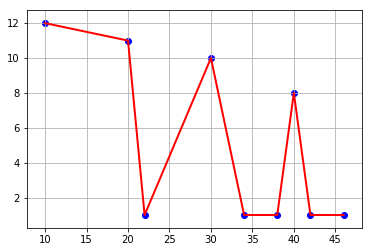

In [11]:
NUM_MAQUINAS = 4 # 4 Maquinas de lavado
TIEMPO_SIMULACION = 50

tiempo = {}
vehiculos = { 'BUS' : [5, NUM_MAQUINAS, 20, 4, TIEMPO_SIMULACION ], 
           'AUTOMOVIL' : [12, NUM_MAQUINAS, 7, 1, TIEMPO_SIMULACION ],
            'FURGONETA': [8, NUM_MAQUINAS, 12, 2, TIEMPO_SIMULACION ]}

for i in entrada:
    print('=============================================================================================')
    print('Lavanderia UPS')
    print('llega:', i)
    print('=============================================================================================')
    print(tiempo)
    random.seed(77) #Semilla
    env=simpy.Environment()
    env.process(ejecutar_simulacion(env, entrada[i][0], entrada[i][1], entrada[i][2], entrada[i][3]))

    # Ejecutamos el proceso durante el tiempo de simulacion
    env.run(until = TIEMPO_SIMULACION)

    # Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()